In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn

In [2]:
df=pd.read_csv('telco_Customer_Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,1357-BIJKI,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Text(0.5, 1.0, 'Churn Rate')

<Figure size 1152x432 with 0 Axes>

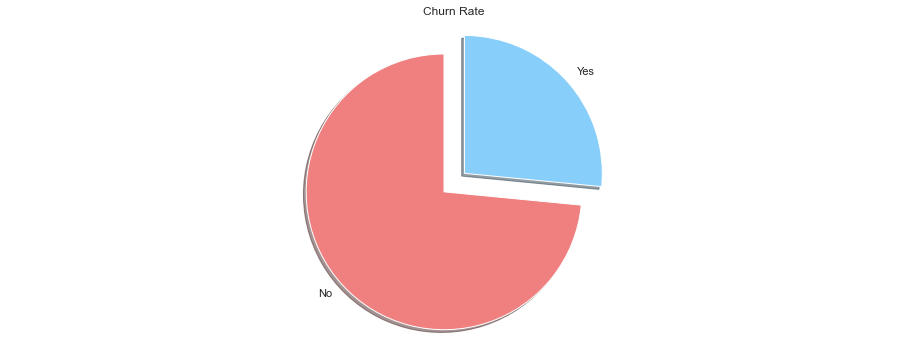

In [5]:
plt.figure(figsize=(16, 6))
plt.figure(figsize=(16, 6))
# Matplotlib Pie Chart
import matplotlib.pyplot as plt
x_labels = ['No', 'Yes']
y = [5174,1869]
colors = ['lightcoral', 'lightskyblue']
explode = (0.2, 0)   # "explode" the forth slice by 0.2
plt.pie(y, labels=x_labels, explode=explode, shadow=True, startangle=90, colors=colors)
plt.axis('equal')   # Draw a circle
plt.title('Churn Rate')

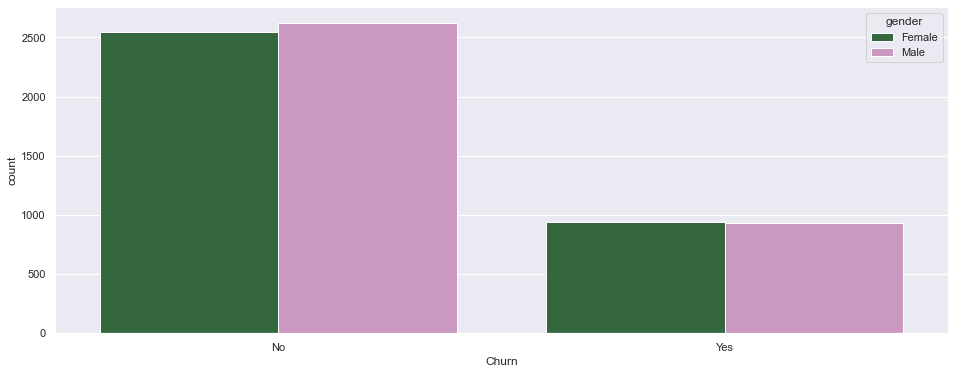

In [6]:
plt.figure(figsize=(16, 6))
sns.countplot(df['Churn'], hue=df['gender'], palette='cubehelix'  )

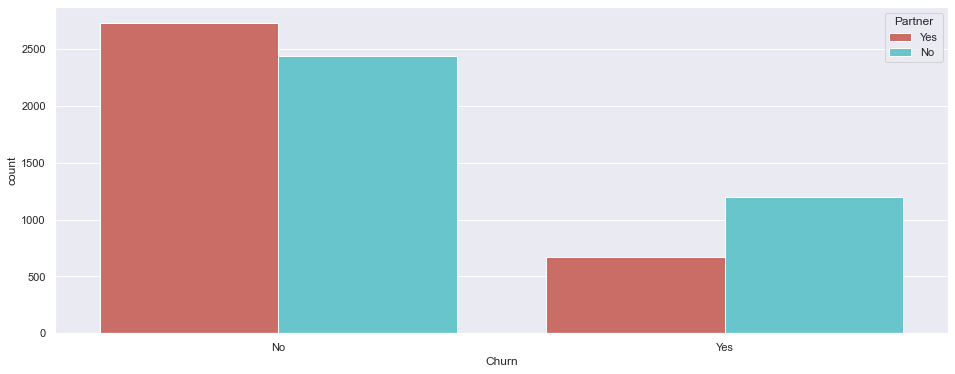

In [7]:
plt.figure(figsize=(16, 6))
sns.countplot(df['Churn'], hue=df['Partner'], palette='hls')

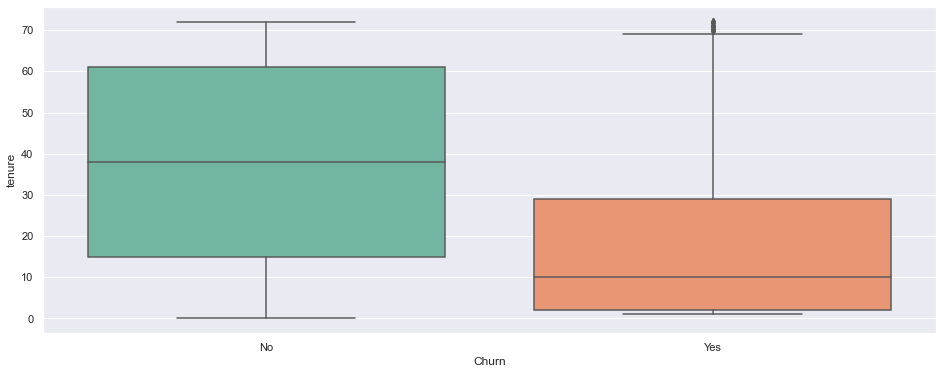

In [8]:
plt.figure(figsize=(16, 6))
sns.boxplot(df['Churn'], df['tenure'], palette="Set2")

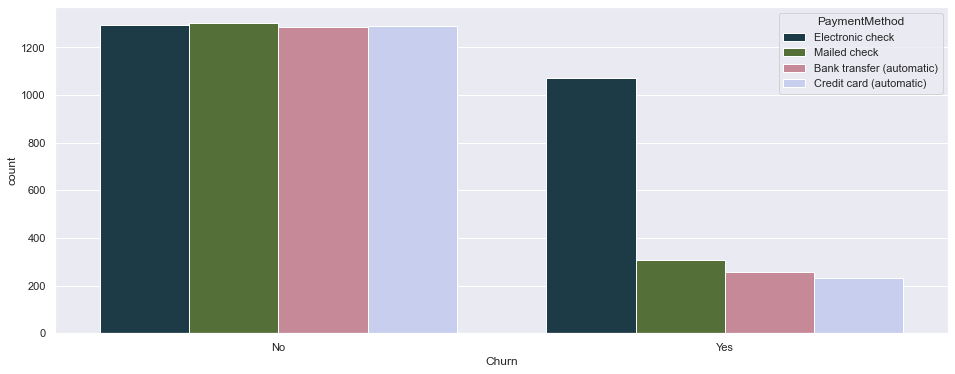

In [9]:
plt.figure(figsize=(16, 6))
sns.countplot(df['Churn'], hue=df['PaymentMethod'], palette='cubehelix'  )


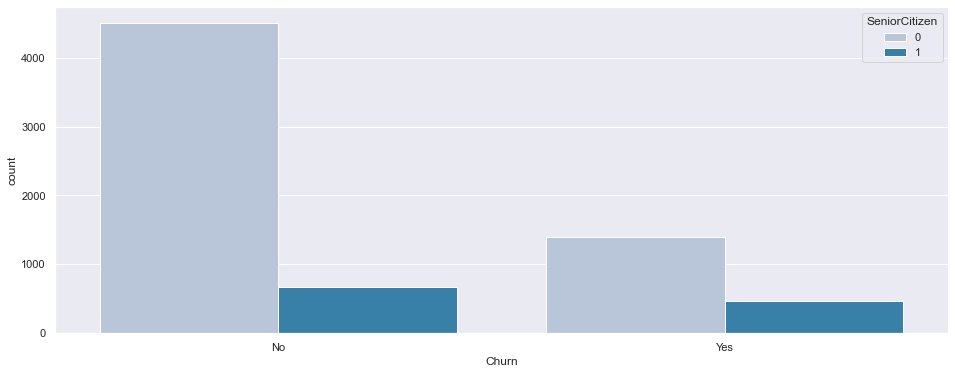

In [10]:
plt.figure(figsize=(16, 6))
sns.countplot(df['Churn'], hue=df['SeniorCitizen'], palette='PuBu' )


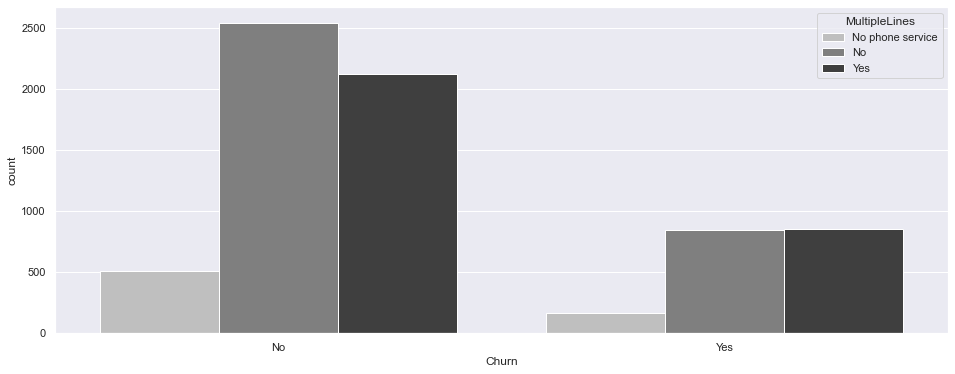

In [11]:
plt.figure(figsize=(16, 6))
sns.countplot(df['Churn'], hue=df['MultipleLines'], palette='gray_r'  )

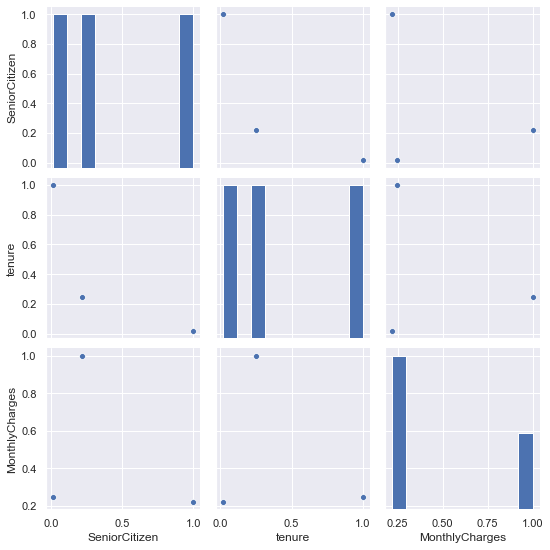

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df.corr())

In [13]:
df.drop(['customerID'], axis=1, inplace=True)

In [14]:
# Categorical data
df['gender']=df['gender'].map({'Male':0,'Female':1})
df['PhoneService']=df['PhoneService'].map({'No':0,'Yes':1})
df['Partner']=df['Partner'].map({'No':0,'Yes':1})
df['Dependents']=df['Dependents'].map({'No':0,'Yes':1})
df['OnlineSecurity']=df['OnlineSecurity'].map({'No':0,'Yes':1})
df['OnlineBackup']=df['OnlineBackup'].map({'No':0,'Yes':1})
df['DeviceProtection']=df['DeviceProtection'].map({'No':0,'Yes':1})
df['TechSupport']=df['TechSupport'].map({'No':0,'Yes':1})
df['StreamingMovies']=df['StreamingMovies'].map({'No':0,'Yes':1})
df['StreamingTV']=df['StreamingTV'].map({'No':0,'Yes':1})
df['PaperlessBilling']=df['PaperlessBilling'].map({'No':0,'Yes':1})
df['Contract']=df['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
df['Churn']=df['Churn'].map({'No':0,'Yes':1})

In [15]:
lines=pd.get_dummies(df['MultipleLines'], drop_first=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0,0,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0,1,0,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,1,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0,0,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,Yes,DSL,1.0,0.0,1.0,1.0,1.0,1.0,1,1,Mailed check,84.80,1990.5,0
7039,1,0,1,1,72,1,Yes,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,1,1,Credit card (automatic),103.20,7362.9,0
7040,1,0,1,1,11,0,No phone service,DSL,1.0,0.0,0.0,0.0,0.0,0.0,0,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,Yes,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Mailed check,74.40,306.6,1


In [16]:
internet=pd.get_dummies(df['InternetService'], drop_first=True)
payment=pd.get_dummies(df['PaymentMethod'], drop_first=True)

In [17]:
df=pd.concat([df,lines,internet,payment], axis=1 )
df.drop(['MultipleLines', 'InternetService','PaymentMethod'], axis=1,inplace=True)

In [18]:
#getting the column values
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'No phone service',
       'Yes', 'Fiber optic', 'No', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)

In [19]:
column_names=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'No phone service', 'Multiplelines', 'Fiber optic',
       'NoMultiplelines', 'Credit card (automatic)', 'Electronic check',
       'Mailed check']

In [20]:
df.columns.shape
df.columns=column_names


In [21]:
#rearranging columns
columns_names_reordered=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling',  'MonthlyCharges',
       'TotalCharges', 'No phone service', 'Multiplelines', 'Fiber optic',
       'NoMultiplelines', 'Credit card (automatic)', 'Electronic check',
       'Mailed check', 'Churn']
df=df[columns_names_reordered]

In [22]:
#imputing missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   7043 non-null   int64  
 1   SeniorCitizen            7043 non-null   int64  
 2   Partner                  7043 non-null   int64  
 3   Dependents               7043 non-null   int64  
 4   tenure                   7043 non-null   int64  
 5   PhoneService             7043 non-null   int64  
 6   OnlineSecurity           5517 non-null   float64
 7   OnlineBackup             5517 non-null   float64
 8   DeviceProtection         5517 non-null   float64
 9   TechSupport              5517 non-null   float64
 10  StreamingTV              5517 non-null   float64
 11  StreamingMovies          5517 non-null   float64
 12  Contract                 7043 non-null   int64  
 13  PaperlessBilling         7043 non-null   int64  
 14  MonthlyCharges          

In [23]:
#imputing missing values
df['SeniorCitizen'].fillna(df['SeniorCitizen'].mode()[0], inplace=True)
df['OnlineSecurity'].fillna(df['OnlineSecurity'].mode()[0], inplace=True)
df['OnlineBackup'].fillna(df['OnlineBackup'].mode()[0], inplace=True)
df['DeviceProtection'].fillna(df['DeviceProtection'].mode()[0], inplace=True)
df['TechSupport'].fillna(df['TechSupport'].mode()[0], inplace=True)
df['StreamingTV'].fillna(df['StreamingTV'].mode()[0], inplace=True)
df['StreamingMovies'].fillna(df['StreamingMovies'].mode()[0], inplace=True)

In [24]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(np.int64)
df['OnlineBackup'] = df['OnlineBackup'].apply(np.int64)
df['TechSupport'] = df['TechSupport'].apply(np.int64)
df['DeviceProtection'] = df['DeviceProtection'].apply(np.int64)  

In [25]:
#imputing missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   7043 non-null   int64  
 1   SeniorCitizen            7043 non-null   int64  
 2   Partner                  7043 non-null   int64  
 3   Dependents               7043 non-null   int64  
 4   tenure                   7043 non-null   int64  
 5   PhoneService             7043 non-null   int64  
 6   OnlineSecurity           7043 non-null   float64
 7   OnlineBackup             7043 non-null   int64  
 8   DeviceProtection         7043 non-null   int64  
 9   TechSupport              7043 non-null   int64  
 10  StreamingTV              7043 non-null   float64
 11  StreamingMovies          7043 non-null   float64
 12  Contract                 7043 non-null   int64  
 13  PaperlessBilling         7043 non-null   int64  
 14  MonthlyCharges          

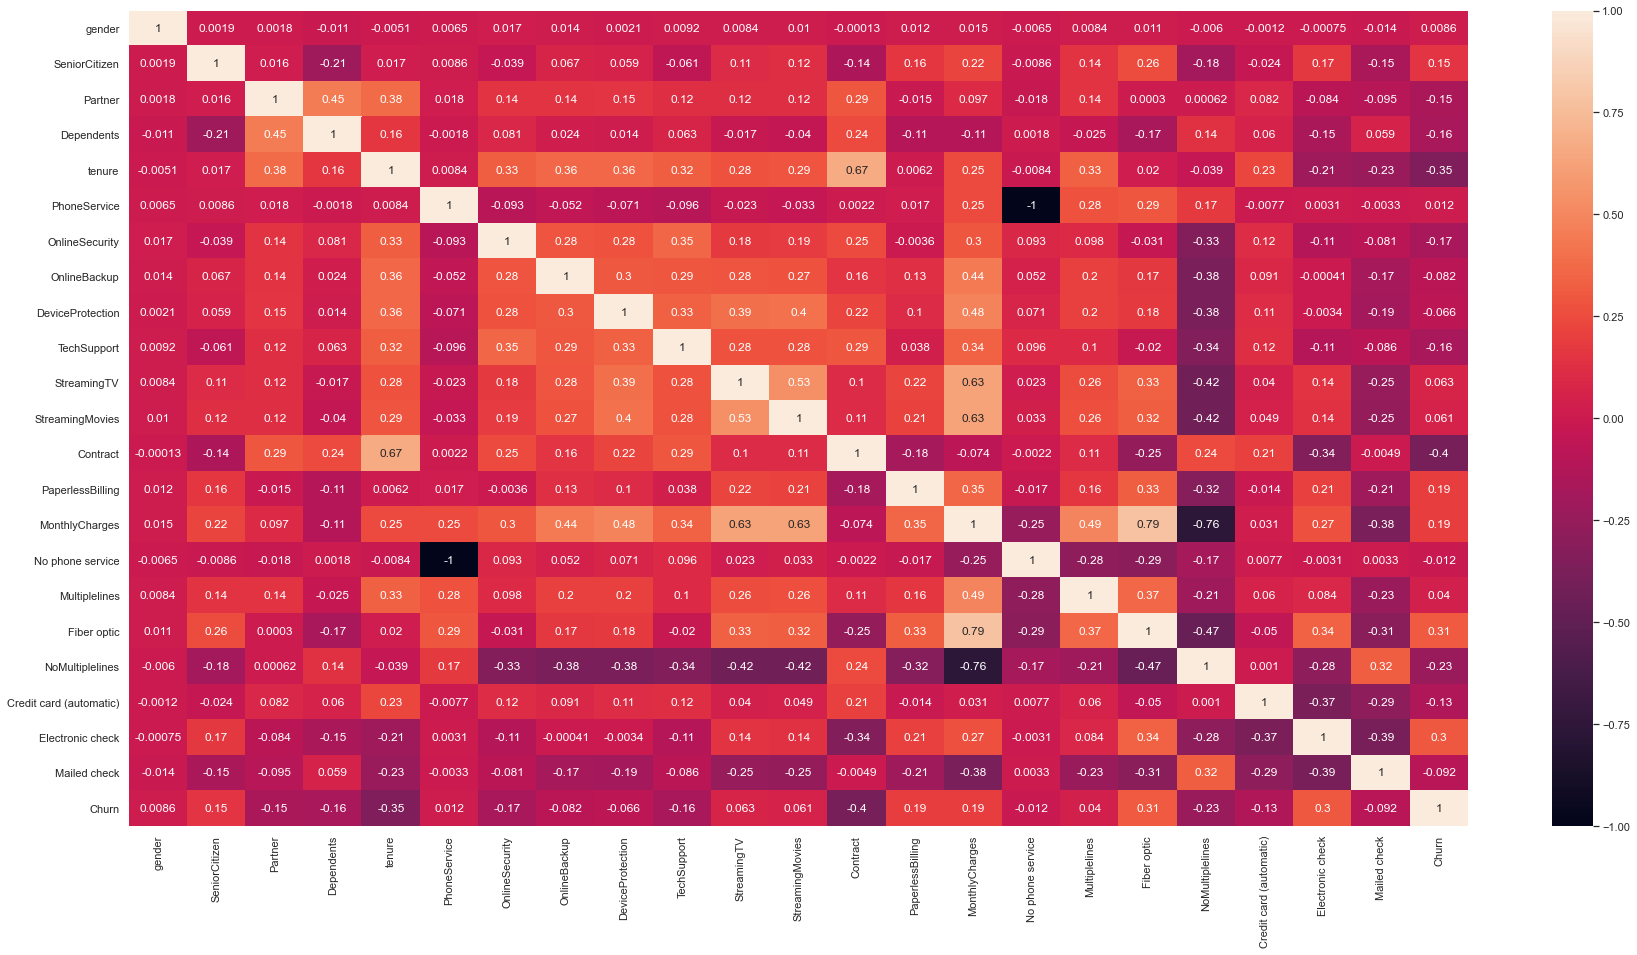

In [26]:
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [27]:
df.drop(['NoMultiplelines', 'No phone service'], axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,No phone service,Multiplelines,Fiber optic,NoMultiplelines,Credit card (automatic),Electronic check,Mailed check,Churn
0,1,0,1,0,1,0,0.0,1,0,0,...,29.85,29.85,1,0,0,0,0,1,0,0
1,0,0,0,0,34,1,1.0,0,1,0,...,56.95,1889.5,0,0,0,0,0,0,1,0
2,0,0,0,0,2,1,1.0,1,0,0,...,53.85,108.15,0,0,0,0,0,0,1,1
3,0,0,0,0,45,0,1.0,0,1,1,...,42.30,1840.75,1,0,0,0,0,0,0,0
4,1,0,0,0,2,1,0.0,0,0,0,...,70.70,151.65,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1.0,0,1,1,...,84.80,1990.5,0,1,0,0,0,0,1,0
7039,1,0,1,1,72,1,0.0,1,1,0,...,103.20,7362.9,0,1,1,0,1,0,0,0
7040,1,0,1,1,11,0,1.0,0,0,0,...,29.60,346.45,1,0,0,0,0,1,0,0
7041,0,1,1,0,4,1,0.0,0,0,0,...,74.40,306.6,0,1,1,0,0,0,1,1


In [28]:
#typecasting totalcharges as it is an object which will give problem in the next process
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)# at 488 column there is a sparse value or null val
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].dtype

dtype('float64')

In [29]:
#After imputing missing values
df.isnull().sum()

gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
tenure                      0
PhoneService                0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSupport                 0
StreamingTV                 0
StreamingMovies             0
Contract                    0
PaperlessBilling            0
MonthlyCharges              0
TotalCharges               11
No phone service            0
Multiplelines               0
Fiber optic                 0
NoMultiplelines             0
Credit card (automatic)     0
Electronic check            0
Mailed check                0
Churn                       0
dtype: int64

In [30]:
df['TotalCharges'].fillna(df.TotalCharges.mean(), inplace=True)

In [31]:
dependent=df['Churn']
independent=df.iloc[:, :-1]
#let us display all the columns of independent variable
pd.options.display.max_columns = None
independent

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,No phone service,Multiplelines,Fiber optic,NoMultiplelines,Credit card (automatic),Electronic check,Mailed check
0,1,0,1,0,1,0,0.0,1,0,0,0.0,0.0,0,1,29.85,29.85,1,0,0,0,0,1,0
1,0,0,0,0,34,1,1.0,0,1,0,0.0,0.0,1,0,56.95,1889.50,0,0,0,0,0,0,1
2,0,0,0,0,2,1,1.0,1,0,0,0.0,0.0,0,1,53.85,108.15,0,0,0,0,0,0,1
3,0,0,0,0,45,0,1.0,0,1,1,0.0,0.0,1,0,42.30,1840.75,1,0,0,0,0,0,0
4,1,0,0,0,2,1,0.0,0,0,0,0.0,0.0,0,1,70.70,151.65,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1.0,0,1,1,1.0,1.0,1,1,84.80,1990.50,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,0.0,1,1,0,1.0,1.0,1,1,103.20,7362.90,0,1,1,0,1,0,0
7040,1,0,1,1,11,0,1.0,0,0,0,0.0,0.0,0,1,29.60,346.45,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,0.0,0,0,0,0.0,0.0,0,1,74.40,306.60,0,1,1,0,0,0,1


In [32]:
#before applying scalling lets see if all the features are integer or float
df.info() # we see total charges as an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   7043 non-null   int64  
 1   SeniorCitizen            7043 non-null   int64  
 2   Partner                  7043 non-null   int64  
 3   Dependents               7043 non-null   int64  
 4   tenure                   7043 non-null   int64  
 5   PhoneService             7043 non-null   int64  
 6   OnlineSecurity           7043 non-null   float64
 7   OnlineBackup             7043 non-null   int64  
 8   DeviceProtection         7043 non-null   int64  
 9   TechSupport              7043 non-null   int64  
 10  StreamingTV              7043 non-null   float64
 11  StreamingMovies          7043 non-null   float64
 12  Contract                 7043 non-null   int64  
 13  PaperlessBilling         7043 non-null   int64  
 14  MonthlyCharges          

In [33]:
from sklearn.model_selection import train_test_split
train_test_split(independent, dependent)
x_train, x_test, y_train, y_test=train_test_split(independent, dependent, train_size=0.7, random_state=1)

# we will use standard scalar instead of min max scalar because we tried min max also but it gave lesser accuracy. In general, min max scalar is used when there are more binary values than continuous values but in standard scalar we have not scaled the binary values. Note that min max scalar also does not scale binary values because scaling binary values reduce the interpretability and hence we did not apply scaling to binary values using standard scalar.


In [34]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
x_train[['tenure','MonthlyCharges','TotalCharges']] = scaled.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
x_test[['tenure','MonthlyCharges','TotalCharges']]=scaled.transform(x_test[['tenure','MonthlyCharges','TotalCharges']])

<ipython-input-34-491de7747724>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[['tenure','MonthlyCharges','TotalCharges']] = scaled.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
C:\Users\Sanya Jain\P\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-34-491de7747724>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 400)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 400)
    log_l1.fit(x_train, y_train)
    log_l2.fit(x_train, y_train)
    train_score_l1.append(log_l1.score(x_train, y_train))
    train_score_l2.append(log_l2.score(x_train, y_train))
    test_score_l1.append(log_l1.score(x_test, y_test))
    test_score_l2.append(log_l2.score(x_test, y_test))

[0.7279918864097363, 0.7872210953346856, 0.801419878296146, 0.8040567951318458, 0.8044624746450304, 0.8042596348884381, 0.8042596348884381]


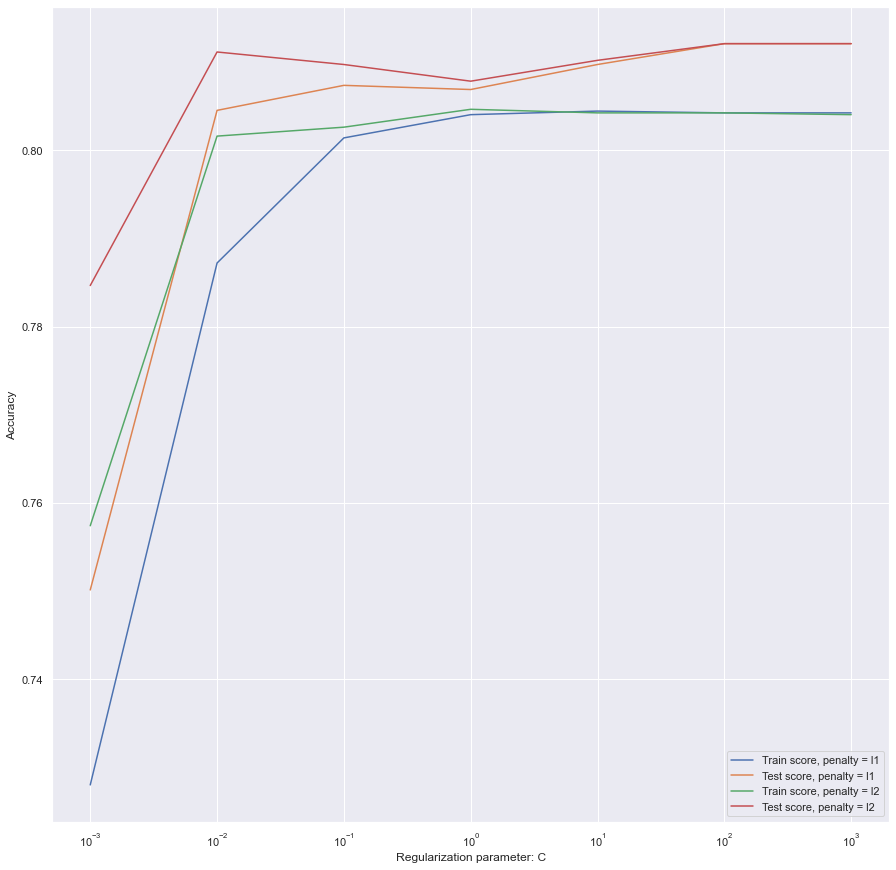

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (15,15))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')
print(train_score_l1)

# As per the graph given above we can take L2 with c=10 as the trade off between the train and test score is justified as the gap between both of them is minimal with high train and test accuracy. We could have taken l1 also as the variance between train and test score is lower for l1 than l2 but l2 gives better train and test accuracy with just a 1% difference. 

In [37]:
log_l = LogisticRegression(penalty = 'l2', C = 10, solver = 'liblinear', max_iter = 400)
log_l.fit(x_train,y_train)

LogisticRegression(C=10, max_iter=400, solver='liblinear')

In [38]:
y_pred = log_l.predict(x_test)
train_pred=log_l.predict(x_train)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[1400,  185],
       [ 217,  311]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(y_test,y_pred)
print('The test accuracy is',round(test_accuracy,4))
train_accuracy=accuracy_score(y_train,train_pred)
print('The train accuracy is',round(train_accuracy,4))

The test accuracy is 0.8097
The train accuracy is 0.8049


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.63      0.59      0.61       528
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.63      0.59      0.61       528
   macro avg       0.21      0.20      0.20       528
weighted avg       0.63      0.59      0.61       528



C:\Users\Sanya Jain\P\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanya Jain\P\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


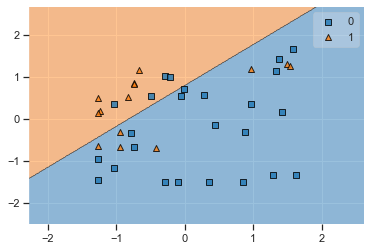

In [42]:
from mlxtend.plotting import plot_decision_regions

X_b = np.array(x_train)[1:40, [4,-9]]
y_b = np.array(y_train[1:40]).flatten()

lreg = LogisticRegression(C=10,max_iter=200)
lreg.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = lreg)


#  KNN classification

In [43]:
from sklearn.neighbors import KNeighborsClassifier
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    train_score_array.append(knn.score(x_train, y_train))
    test_score_array.append(knn.score(x_test, y_test))

In [44]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param = { 'n_neighbors':[1,3,5,7,9,11,13,15]}
knnc= GridSearchCV(knn,param,cv=3, return_train_score=True)
knnc.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]},
             return_train_score=True)

In [45]:
knnc.best_params_

{'n_neighbors': 13}

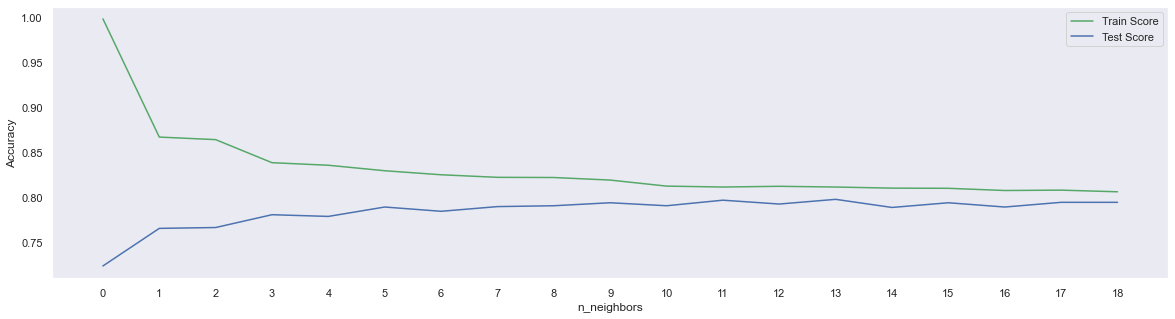

In [46]:
x_axis = range(1,20)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(x_axis, np.arange(20))
plt.grid()
plt.legend()

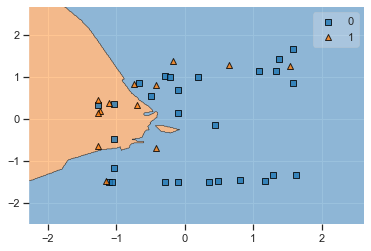

In [47]:
from mlxtend.plotting import plot_decision_regions

X_b = np.array(x_train)[20:60,[4,-9]]
y_b = np.array(y_train[20:60]).flatten()

knn = KNeighborsClassifier(13)
knn.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = knn)

# let us take 11 neighbours as per the above graph

In [48]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [49]:
y_pred = knn.predict(x_test)
train_pred=knn.predict(x_train)

In [50]:
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(y_test,y_pred)
print('The test accuracy is',round(test_accuracy,4))
train_accuracy=accuracy_score(y_train,train_pred)
print('The train accuracy is',round(train_accuracy,4))

The test accuracy is 0.7908
The train accuracy is 0.8126


In [51]:
confusion_matrix(y_test, y_pred)

array([[1357,  228],
       [ 214,  314]], dtype=int64)

In [52]:
print(classification_report(y_test, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.58      0.59      0.59       528
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.58      0.59      0.59       528
   macro avg       0.19      0.20      0.20       528
weighted avg       0.58      0.59      0.59       528



C:\Users\Sanya Jain\P\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanya Jain\P\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Linear SVC Without Gridsearch CV 

In [53]:
from sklearn.svm import LinearSVC, SVC

In [54]:
svc=LinearSVC()
svc.fit(x_train,y_train)
pred_linearsvc=svc.predict(x_train)
print('The train accuracy is',round(svc.score(x_train,y_train),4))
print('The test accuracy is', round(svc.score(x_test,y_test),4))

The train accuracy is 0.8026
The test accuracy is 0.8064


In [78]:
print(classification_report(y_test, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.65      0.41      0.50       528
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.65      0.41      0.50       528
   macro avg       0.22      0.14      0.17       528
weighted avg       0.65      0.41      0.50       528



C:\Users\Sanya Jain\P\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanya Jain\P\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Linear SVC With Gridsearch CV 

In [55]:
from sklearn.model_selection import GridSearchCV
linsvc = LinearSVC()
param = { 'C':[0.001,0.01,0.1,1,10,100,100], 'penalty': ['l1','l2']  }
linear_svc= GridSearchCV(linsvc,param,cv=5, return_train_score=True)
linear_svc.fit(x_train,y_train)

C:\Users\Sanya Jain\P\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Sanya Jain\P\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sanya Jain\P\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\Sanya Jain\P\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\Sanya Jain\P\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 100],
                         'penalty': ['l1', 'l2']},
             return_train_score=True)

In [56]:
linear_svc.best_params_

{'C': 10, 'penalty': 'l2'}

In [57]:
svc=LinearSVC(C=10, penalty='l2')
svc.fit(x_train,y_train)
pred_linearsvc=svc.predict(x_train)
print('The train accuracy is',round(svc.score(x_train,y_train),4))
print('The test accuracy is', round(svc.score(x_test,y_test),4))

The train accuracy is 0.8032
The test accuracy is 0.806


C:\Users\Sanya Jain\P\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [80]:
y_pred = linear_svc.predict(x_test)
train_pred=linear_svc.predict(x_train)

In [81]:
print(classification_report(y_test, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.62      0.58      0.60       528
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.62      0.58      0.60       528
   macro avg       0.21      0.19      0.20       528
weighted avg       0.62      0.58      0.60       528



C:\Users\Sanya Jain\P\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanya Jain\P\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


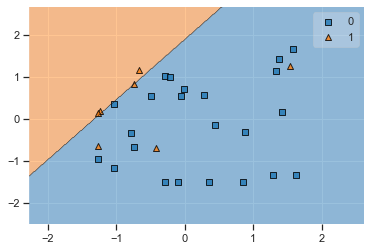

In [58]:
#Decision boundary
X_b = np.array(x_train)[10:40,[4,-9]]
y_b = np.array(y_train[10:40]).flatten()

clf= LinearSVC(C=1)
clf.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = clf)

# SVC with different kernels

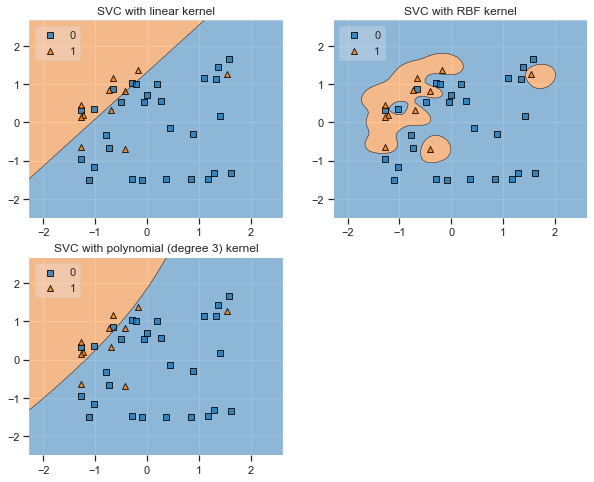

In [59]:
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions 
import itertools
C = 10
X_b = np.array(x_train)[10:50,[4,-9]]
y_b = np.array(y_train[10:50])

clf2 = SVC(kernel='linear', C=C)
clf3 = SVC(kernel='rbf', gamma=10, C=C)
clf4 = SVC(kernel='poly', degree=3, C=C)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = [
          'SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for clf, lab, grd in zip([ clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_b, y_b)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_b, y=y_b,
                                clf=clf, legend=2)
    plt.title(lab)

# Using grid serach the best kernel is poly

# SVC with Poly kernel

In [60]:
svc_kernel=SVC()
param = { 'kernel':['linear','rbf','poly'], 'C': [1, 10, 100]}
svc= GridSearchCV(svc_kernel,param,cv=5, return_train_score=True)
svc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             return_train_score=True)

In [61]:
svc.best_params_

{'C': 1, 'kernel': 'poly'}

In [62]:
svc.best_score_

0.7973630831643003

In [63]:
svc_lin=SVC(kernel='poly', C=1)

svc_lin.fit(x_train,y_train)
print('The train score is', round(svc.score(x_train,y_train),4))
print('The test score is', round (svc.score(x_test,y_test),4))


The train score is 0.814
The test score is 0.8102


In [84]:
y_pred = svc.predict(x_test)
train_pred=svc.predict(x_train)

In [85]:
print(classification_report(y_test, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.61      0.56      0.58       528
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.61      0.56      0.58       528
   macro avg       0.20      0.19      0.19       528
weighted avg       0.61      0.56      0.58       528



C:\Users\Sanya Jain\P\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanya Jain\P\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVC with kernal: RBF

C:\Users\Sanya Jain\P\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


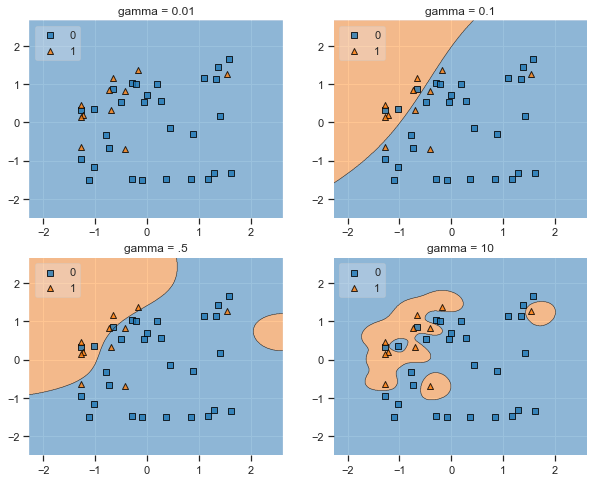

In [64]:
from matplotlib import gridspec
import itertools
C = 10
clf1 = SVC(kernel='rbf', gamma=0.01, C=C)
clf2 = SVC(kernel='rbf', gamma=0.1, C=C)
clf3 = SVC(kernel='rbf', gamma=0.5, C=C)
clf4 = SVC(kernel='rbf', gamma=10, C=C)

X_b = np.array(x_train)[10:50,[4,-9]]
y_b = np.array(y_train[10:50])

models = (SVC(kernel='rbf', gamma=0.01, C=10),
         SVC(kernel = 'rbf', gamma = 0.1, C = 10),
         SVC(kernel = 'rbf', gamma = 0.5, C = 10),
         SVC(kernel = 'rbf', gamma = 10, C = 10))


gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))
labels = ['gamma = 0.01',
          'gamma = 0.1',
          'gamma = .5',
          'gamma = 10']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_b, y_b)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_b, y=y_b,
                                clf=clf, legend=2)
    plt.title(lab)

In [65]:
svc=SVC(kernel='rbf',gamma=0.5)
svc.fit(x_train,y_train)

pred_rbf_svc=svc.predict(x_test)
print('The train score is', round(svc.score(x_train,y_train),4))
print('The test score is', round (svc.score(x_test,y_test),4))

The train score is 0.8763
The test score is 0.8017


In [86]:
y_pred = svc.predict(x_test)
train_pred=svc.predict(x_train)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_rbf_svc, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.86      0.88      0.87      1585
         one       0.61      0.56      0.58       528

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113



# Decision tree

In [67]:
from sklearn import tree
clf1=tree.DecisionTreeClassifier()
clf1.fit(x_train, y_train)

DecisionTreeClassifier()

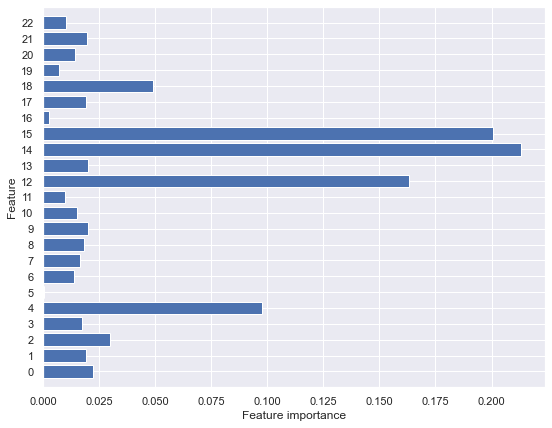

In [68]:
%matplotlib inline

def plot_feature_importances_(model):
    fig, ax = plt.subplots(figsize=(9, 7))
    n_features = x_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_(clf1)

In [69]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],'min_samples_split' : range(2,15),'max_depth': range(1,15)}
grid_search = GridSearchCV(estimator = clf1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [70]:
grid_search = grid_search.fit(x_train, y_train)

In [71]:
accuracy = grid_search.best_score_
accuracy 

0.7880324543610547

In [72]:
clf1=tree.DecisionTreeClassifier(max_depth=3, min_samples_split= 2, criterion= 'gini')
clf1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [73]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],'min_samples_split' : range(2,15),'max_depth': range(1,15)}
grid_search = GridSearchCV(estimator = clf1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [93]:
from sklearn.metrics import accuracy_score
y_pred = clf1.predict(x_test)
x_pred=clf1.predict(x_train)

print('The train accuracy is',round(clf1.score(x_train,y_train),4))
print('The test accuracy is', round(clf1.score(x_test,y_test),4))

The train accuracy is 0.7882
The test accuracy is 0.7979


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.82      0.93      0.87      1585
         one       0.65      0.41      0.50       528

    accuracy                           0.80      2113
   macro avg       0.74      0.67      0.69      2113
weighted avg       0.78      0.80      0.78      2113



In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1471,  114],
       [ 313,  215]], dtype=int64)

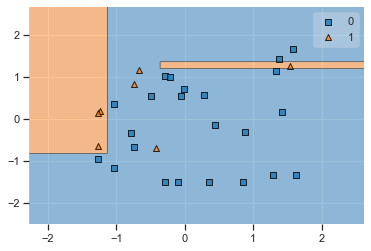

In [76]:
#Decision boundary
from sklearn.tree import DecisionTreeClassifier

from mlxtend.plotting import plot_decision_regions

X_b = np.array(x_train)[10:40,[4,-9]]
y_b = np.array(y_train[10:40]).flatten()

dtree= DecisionTreeClassifier(max_depth=3,min_samples_split= 2, criterion= 'gini')
dtree.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = dtree)

In [99]:
Algorithm=['Logistic Regression', 'KNN Classifier','Linear SVC', 'SVC with Kernel:RBF','SVC with Poly','Decision Tree']

table=pd.DataFrame(columns=['Algorithm'], data=Algorithm)
table['Train_accuracy']=[0.8049,0.8126,0.8018,0.8763,0.814,0.7979]
table['Test accuracy']=[0.8097,0.7908,0.8079,0.8017,0.8102,0.7882]
table['F1 Score']=[.59,0.59,0.60,0.80,.58,0.78]
table


,Algorithm,Train_accuracy,Test accuracy,F1 Score
0,Logistic Regression,0.8049,0.8097,0.59
1,KNN Classifier,0.8126,0.7908,0.59
2,Linear SVC,0.8018,0.8079,0.60
3,SVC with Kernel:RBF,0.8763,0.8017,0.80
4,SVC with Poly,0.8140,0.8102,0.58
5,Decision Tree,0.7979,0.7882,0.78


In [ ]:
# we would choose SVC with poly kernel as It has good train and test accuracy 
#and also there is low variance between train and test accuracy. We could have chosen SVC with RBF but it has high variance.